# Probabilistic Modelling Lab

The goal of this lab session is to get you going with doing probabilistic modelling in Python and better understand the underlying concepts through simulation and actual computational examples.

In this lab we focus on the central limit theorem (CLT), which is one of the most important theorems to do probabilistic modelling in the real world. In the lectures we have seen the CLT and hopefully you get the inutition of the result. Informally, in the limit as the number of samples gets larger the sample mean tends to a normal distribution. 

But say we have a sample of N points, how many points do we actually need so that it makes sense to use the CLT? In other words if we use the CLT and we don't have enough samples, we will get very invalid results.

Today we want to gain a better understanding of how quickly or slowly the distribution of the sample mean actually tends to a Gaussian distribution and how this depends on the underlying distribution.



## Sampling from a distribution in Python

First we need to understand how to sample from a distribution.
If you are interested in stochastic simulation and sampling, there are many methods you can use to sample from distributions (inversion sampling, rejection sampling, Markov Chain Monte Carlo, Gibbs Sampler,...). But for now don't worry about those.

For now we will use the numpy.random library to sample from a distribution.



In [1]:
# import numpy
import numpy as np
# import your favourite plotting package
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# for example this samples from a standard normal rv
x = np.random.normal(loc=0.0, scale=1.0, size=100)

<AxesSubplot: ylabel='Count'>

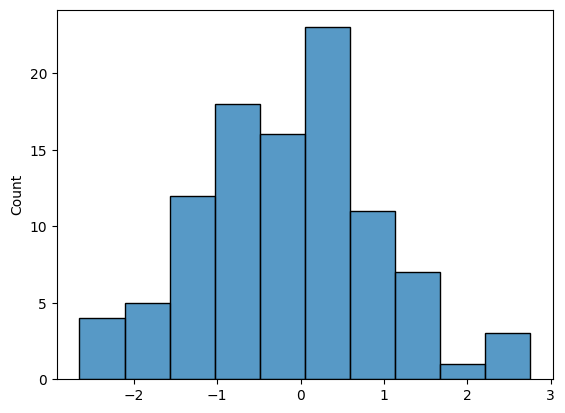

In [3]:
# check out the histogram
sns.histplot(x)

Text(0.5, 1.0, '10000 points')

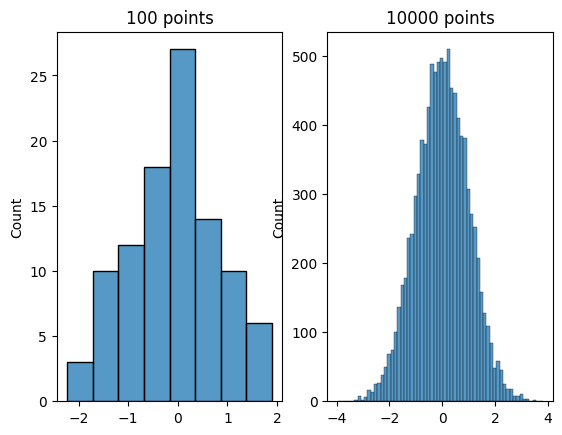

In [4]:
# How does it look for more points?
x1 = np.random.normal(loc=0.0, scale=1.0, size=100)
x2 = np.random.normal(loc=0.0, scale=1.0, size=10000)

fig, (ax1, ax2) = plt.subplots(1,2)

sns.histplot(ax=ax1, x=x1)
ax1.set_title("100 points")

sns.histplot(ax=ax2, x=x2)
ax2.set_title("10000 points")

1. Pick a distribution that is not the normal distribution (but is available in [numpy.random](https://numpy.org/doc/1.16/reference/routines.random.html)) and sample from it.

In [5]:
def sample(N):
  # sample N samples from your distribution (Beta(2,3))
  x = np.random.beta(a = 2, b = 3, size = (N,))
  return x


2. Complete the function below to compute the sample mean given an input vector of samples.

In [34]:
def sample_mean(x):
  output = np.mean(x)
  return output

3. Assume you have a population distributed according to the distribution you picked in 1. So we have control over the sample size. Convince us that the distribution of the sample mean for your population does indeed tend to the normal distribution as specified in the CLT. 
- How can you show this? Visually? Be creative!
- How quickly does it tend to the Gaussian distribution?
- Would you get away with just using 10, 100, 400, 1000 data points to make statements about the distribution of your estimator using the CLT?

In [45]:
def iterate_sample_mean(n_iterations, n_samples):
    means = [0]*n_iterations
    for i in range(n_iterations):
        sample_x = sample(n_samples)
        sample_mean_x = sample_mean(sample_x)
        means[i] += sample_mean_x
    return means


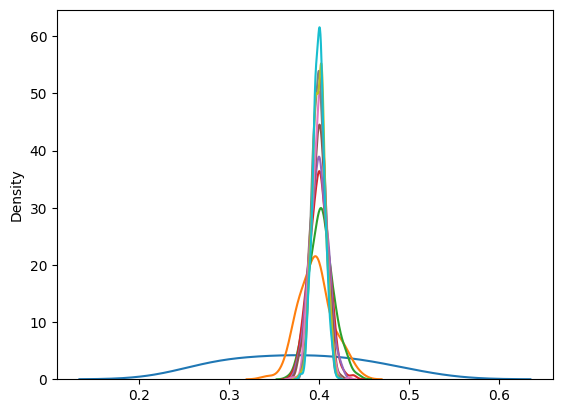

In [55]:
N = np.arange(10, 1000, 100)

samples_dictionary = {n: iterate_sample_mean(n,n) for n in N}

for i in range(len(N)):
    sns.kdeplot(data = samples_dictionary[N[i]], common_norm=True)



If you are struggling with ideas and need some inspiration have a look [here](https://towardsdatascience.com/how-to-compare-two-or-more-distributions-9b06ee4d30bf).

4. Compare and discuss your results with someone who has chosen a different distribution.

5. Can you find a distribution for which the central limit theorem does not hold? Why does it not hold?